# Лабораторная работа №8 

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1. Содержательная постановка задачи.
Рассматривается популяционная модель, описывающая рост народонаселения мира. Целью задачи является выявление зависимости начальной равновесной численности популяции $N_p(t_0)$ от коэффициента прироста населения $\alpha(t_0)$ в условиях ограниченных ресурсов для пищи.

# 2. Концептуальная постановка задачи. 
Для решения данной задачи предполагается наличие математической модели, описывающей рост народонаселения мира. При этом учитывается:

* Существование равновесной численности популяции $N_p(t)$, которую может обеспечить окружающая среда (производство продовольствия).


*  Зависимость скорости изменения численности популяции от самой численности, умноженной на отклонение от равновесного значения.

# 3. Математическая постановка задачи.
Для выявления зависимости начальной равновесной численности популяции$ N_p(t_0)$ от коэффициента прироста населения $\alpha(t_0)$ используются следующие математические уравнения:

Уравнение роста популяции: 
$\frac{dN(t)}{dt} = \alpha(t) * (1 - \frac{N(t)}{N_p(t)}) * N(t) $

где:

* N(t) - численность популяции в момент времени t.
* p(t) - равновесная численность популяции в момент времени t.
* alpha(t) - коэффициент прироста населения в момент времени t.
Известно, что $N(t_0) = N_0, N_p(t_0) = N_{p0}$, и $\alpha(t_0) = \alpha_0$. Задачей является нахождение $N_p(t_0) $в зависимости от $\alpha(t_0)$.

Решение данной математической задачи поможет выявить, как различные значения $\alpha(t_0)$ влияют на начальную равновесную численность популяции $N_p(t_0)$ при заданных начальных условиях.

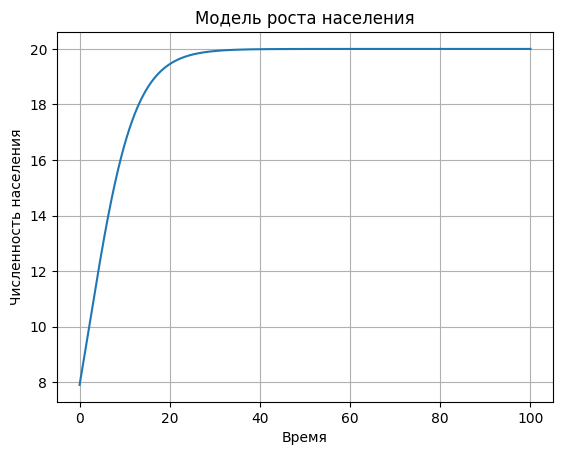

In [6]:
def population_growth(N, t, alpha, Np0, N0):
    dNdt = alpha * (1 - N / Np0) * N
    return dNdt


N0 = 7.9  
Np0 = 20  
alpha0 = 0.2 


t = np.linspace(0, 100, 1000)  


N = odeint(population_growth, N0, t, args=(alpha0, Np0, N0))


plt.figure()
plt.plot(t, N)
plt.xlabel('Время')
plt.ylabel('Численность населения')
plt.title('Модель роста населения')
plt.grid(True)
plt.show()



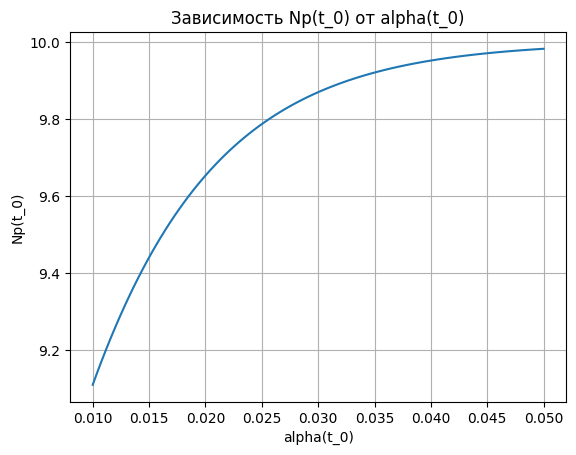

In [4]:
def population_growth(N, t, alpha, Np0, N0):
    dNdt = alpha * (1 - N / Np0) * N
    return dNdt


def find_equilibrium_population(Np0_guess, alpha, N0):
    t = np.linspace(0, 100, 1000)  
    N = odeint(population_growth, N0, t, args=(alpha, Np0_guess, N0))
    return N[-1, 0]


N0 = 7.9 
alpha0 = 0.02 


alpha_values = np.linspace(0.01, 0.05, 100) 


Np_values = []
for alpha in alpha_values:
    Np_guess = 10  # Начальное предположение для Np(t_0)
    Np = find_equilibrium_population(Np_guess, alpha, N0)
    Np_values.append(Np)


plt.figure()
plt.plot(alpha_values, Np_values)
plt.xlabel('alpha(t_0)')
plt.ylabel('Np(t_0)')
plt.title('Зависимость Np(t_0) от alpha(t_0)')
plt.grid(True)
plt.show()
